In [10]:
import tensorflow as tf
tf.enable_eager_execution() # ensure active for TF1.x default active on TF>2.0

import tensorflow_probability as tfp
tfd = tfp.distributions


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [5]:
tf.executing_eagerly()

True

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(8,8)

# uncomment below if retina display
# %config InlineBackend.figure_format='retina'

# Distributions

In [3]:
rv_normal = tfd.Normal(0,2)

In [4]:
sample_t = rv_normal.sample([100])

In [6]:
sample_np = sample_t.numpy()

(array([0.00915997, 0.0274799 , 0.08243969, 0.18319934, 0.19235931,
        0.21983921, 0.10075964, 0.05495979, 0.02747991, 0.01831993]),
 array([-4.9615564 , -3.8698494 , -2.7781425 , -1.6864353 , -0.5947283 ,
         0.49697876,  1.5886858 ,  2.6803927 ,  3.7721    ,  4.8638067 ,
         5.955514  ], dtype=float32),
 <a list of 10 Patch objects>)

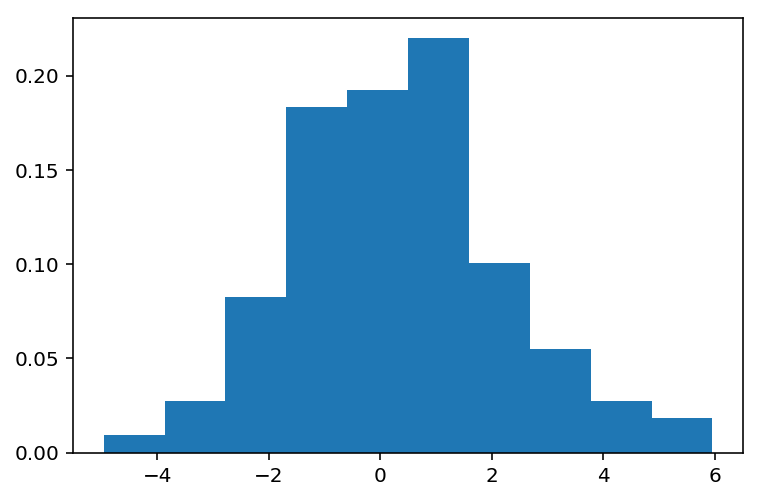

In [9]:
plt.hist(sample_np, density=True)

# Linear Model

In [12]:
x,y = np.load("Data_LinearModel.npy")

[Text(0, 0.5, 'Height'),
 Text(0.5, 0, 'Days'),
 Text(0.5, 1.0, 'Observed measures of height')]

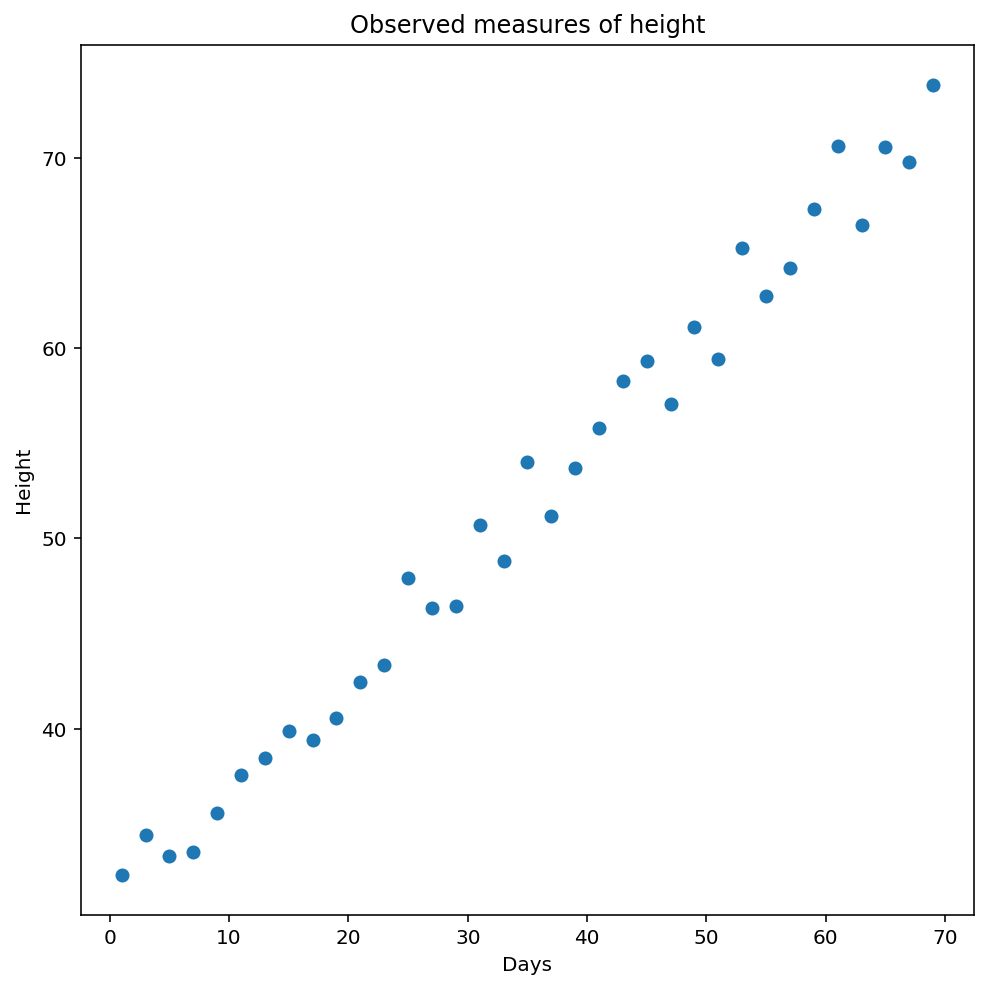

In [23]:
plt.scatter(x,y)
ax = plt.subplot(1,1,1)
ax.set(xlabel="Days",
          ylabel="Height",
          title="Observed measures of height")

In [13]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(2),
  tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1],
                           scale=0.001 + tf.math.softplus(0.05 * t[..., 1:]))),
])
loss = lambda y, p_y: -p_y.log_prob(y)
# Do inference.
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.05), loss=loss)
model.fit(x, y, epochs=2000, verbose=False)

Instructions for updating:
Colocations handled automatically by placer.


create 1 year of x_test data (days)

In [14]:
x_test = np.array([i for i in range(1,365)],dtype=np.float32).reshape(-1,1)
y_pred_t = model(x_test)

obtain mean and std

In [15]:
mean = y_pred_t.mean().numpy().squeeze()
std = y_pred_t.stddev().numpy().squeeze()
lower = mean - 2 * std
upper = mean + 2 * std

plot data to visualise model performance

[Text(0, 0.5, 'Height'),
 Text(0.5, 0, 'Days'),
 Text(0.5, 1.0, 'Prediction of first year height')]

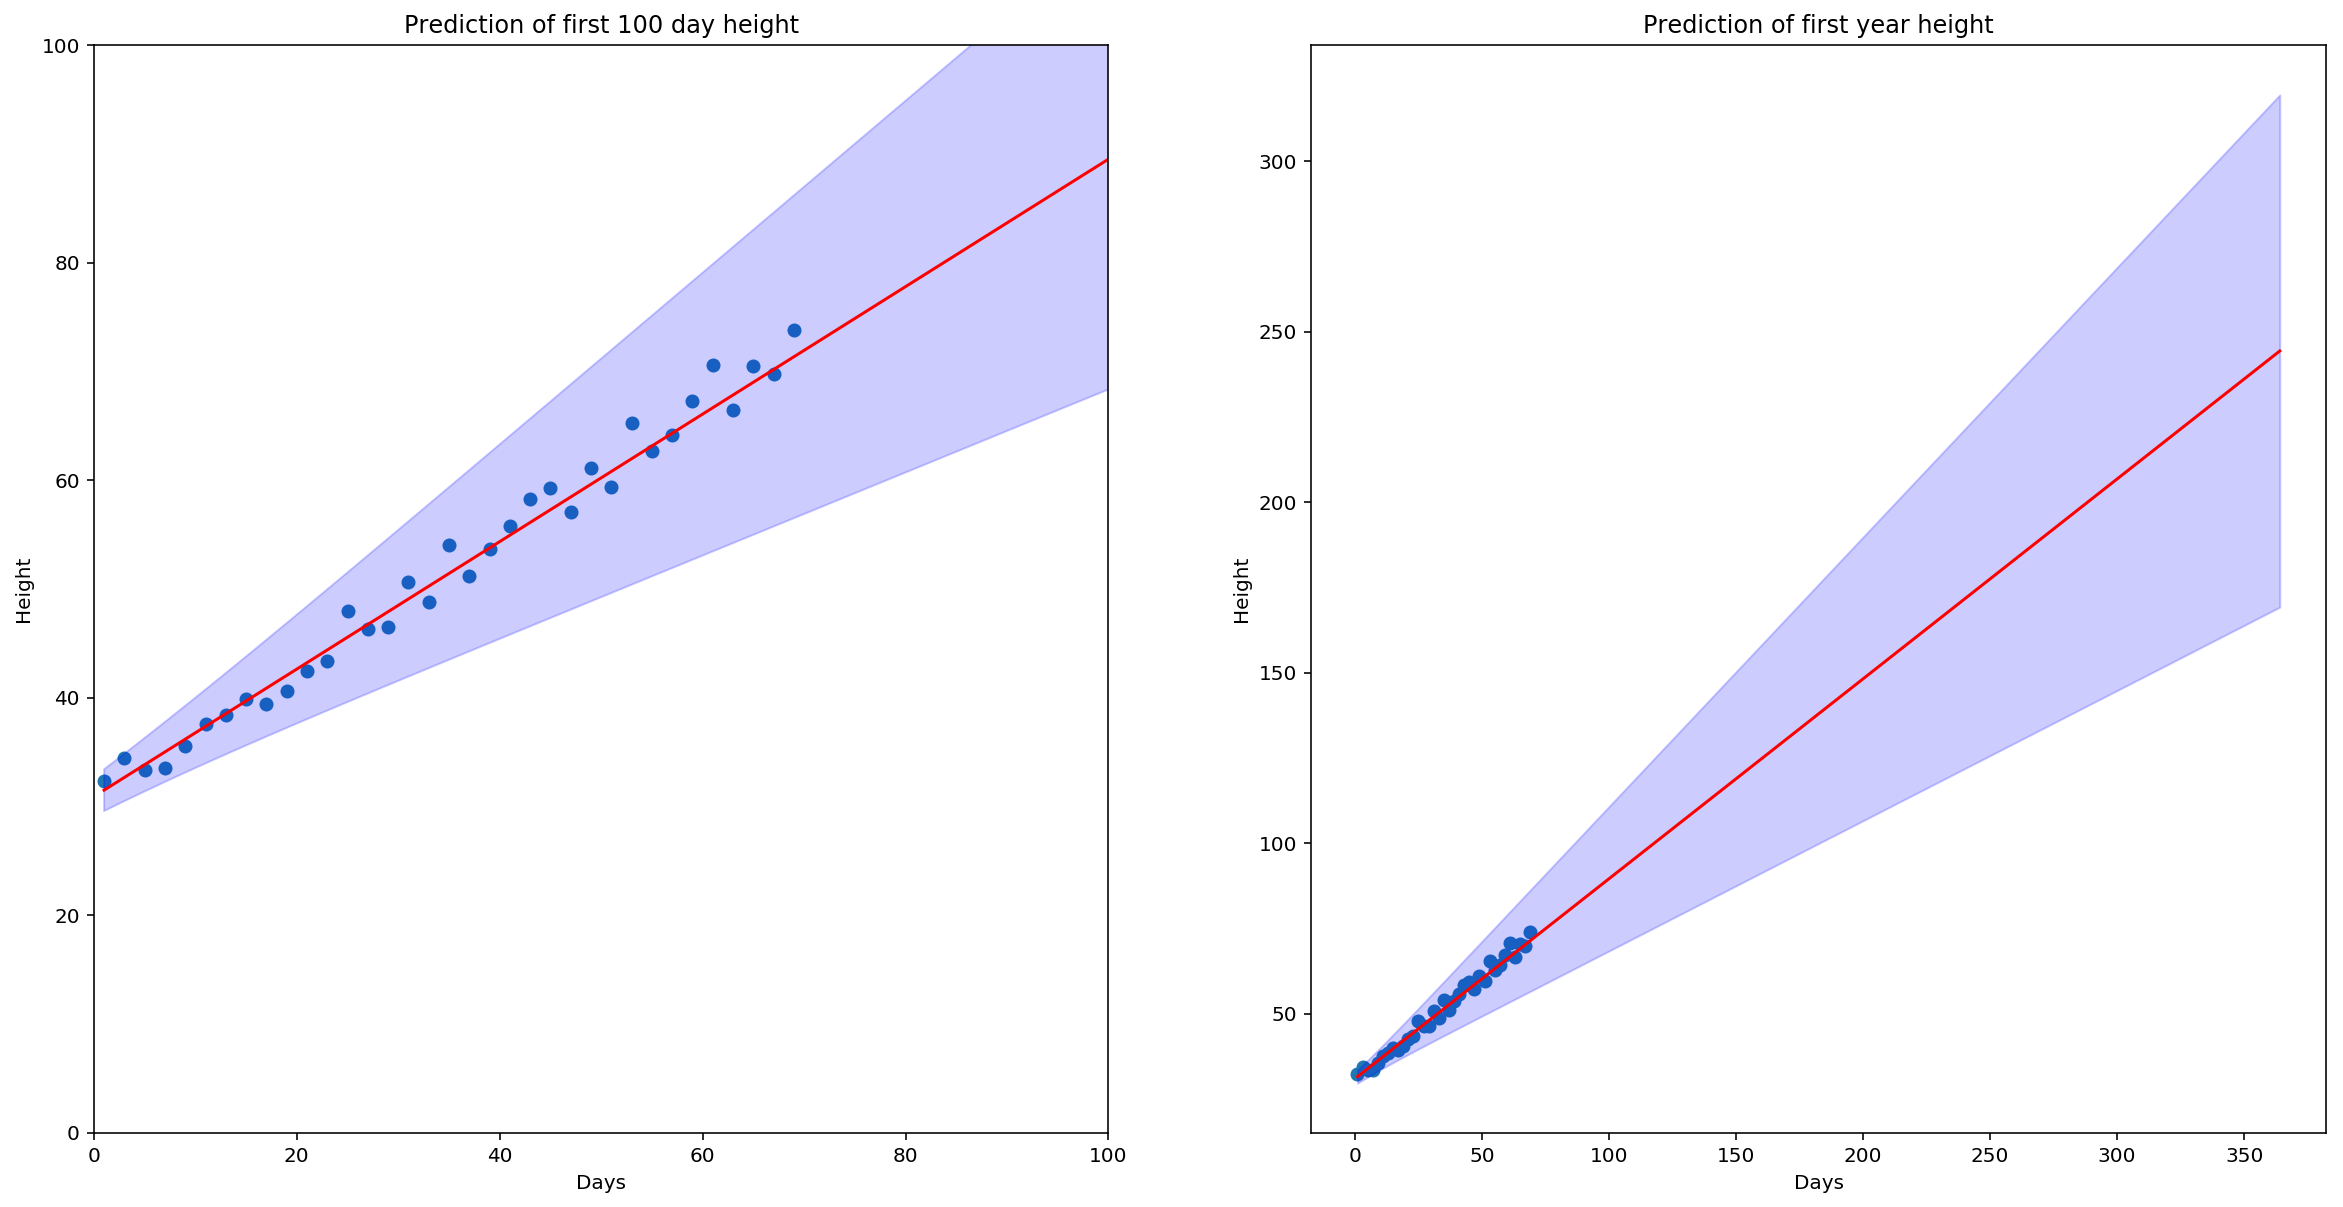

In [21]:
fig=plt.figure(figsize=(20,10))

ax = plt.subplot(1,2,1)
ax.scatter(x,y)
ax.plot(x_test[:100],mean[:100], 'r-')
ax.fill_between(x_test.squeeze(),
                   lower,
                   upper,
                   alpha=0.2, color='b')
ax.set(xlabel="Days",
          ylabel="Height",
          title="Prediction of first 100 day height")
plt.xlim(0,100)
plt.ylim(0,100)

ax = plt.subplot(1,2,2)
ax.scatter(x,y)
ax.plot(x_test,mean, 'r-')
ax.fill_between(x_test.squeeze(),
                   lower,
                   upper,
                   alpha=0.2, color='b')
ax.set(xlabel="Days",
          ylabel="Height",
          title="Prediction of first year height")

In [18]:
mean[-1]

244.3173

In [17]:
upper[-1] - lower[-1]

150.25912

In [20]:
150.2/244

0.6155737704918033